In [65]:
import requests
from bs4 import BeautifulSoup
import pickle

In [67]:
player_store = []

for i in range(2000, 2018):
    url = "https://www.pro-football-reference.com/years/" + str(i) + "/receiving.htm"
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    stats_table = soup.find(id="all_receiving")
    players = stats_table.find_all("tr")

    for player in players:
        player = player.find_all("td")

        row = {}

        try:
            row['name'] = player[0].get_text()
            row['demo_link'] = player[0].find('a')['href']
            row['team'] = player[1].get_text()
            row['age'] = player[2].get_text()
            row['position'] = player[3].get_text()
            row['games'] = player[4].get_text()
            row['games_start'] = player[5].get_text()
            row['targets'] = player[6].get_text()
            row['receptions'] = player[7].get_text()
            row['catch_pct'] = player[8].get_text()
            row['rec_yards'] = player[9].get_text()
            row['yards_per_rec'] = player[10].get_text()
            row['td'] = player[11].get_text()
            row['longest_rec'] = player[12].get_text()
            row['rec_per_game'] = player[13].get_text()
            row['rec_yards_per_game'] = player[14].get_text()
            row['fumble'] = player[15].get_text()

            player_store.append(row)

        except:
            print("Ran into header row.")

Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into header row.
Ran into head

In [68]:
len(player_store)

7833

In [69]:
# pickle.dump(player_store, open("player_store.p", "wb" ) )

In [150]:
for i, player in enumerate(player_store):
    
    if i % 100 == 0:
        print(i)
        
    if "height" in player.keys():
        continue
        
    url = "https://www.pro-football-reference.com/" + str(player['demo_link'])
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    try:
        player_store[i]['height'] = soup.find(itemprop="height").get_text()
        player_store[i]['weight'] = soup.find(itemprop="weight").get_text()
        
    except:
        print("No demographic info")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
No demographic info
6000
6100
6200
6300
6400
No demographic info
No demographic info
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800


In [151]:
len(player_store)

7833

In [152]:
# pickle.dump(player_store, open("player_store_v3.p", "wb" ) )

In [83]:
import pandas as pd

In [153]:
df = pd.DataFrame(player_store)

In [154]:
df.head(50)

,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,position,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec
0,28,60.4%,/players/H/HarrMa00.htm,2,16,16,6-5,78,Marvin Harrison*,WR,6.4,1413,88.3,102,169,14,IND,247lb,13.9
1,27,65.4%,/players/M/MuhaMu00.htm,1,16,16,5-10,36,Muhsin Muhammad,WR,6.4,1183,73.9,102,156,6,CAR,247lb,11.6
2,32,67.8%,/players/M/McCaEd00.htm,0,16,16,6-2,61,Ed McCaffrey,wr,6.3,1317,82.3,101,149,9,DEN,200lb,13.0
3,30,57.8%,/players/S/SmitRo01.htm,1,16,16,6-3,49,Rod Smith*,wr,6.3,1602,100.1,100,173,8,DEN,243lb,16.0
4,27,66.4%,/players/O/OwenTe00.htm,3,14,13,6-0,69,Terrell Owens*+,WR,6.9,1451,103.6,97,146,13,SFO,220lb,15.0
5,35,59.6%,/players/C/CartCr00.htm,3,16,16,5-11,53,Cris Carter*,WR,6.0,1274,79.6,96,161,9,MIN,213lb,13.3
6,28,62.3%,/players/H/HornJo00.htm,1,16,16,5-11,52,Joe Horn*,WR,5.9,1340,83.8,94,151,8,NOR,180lb,14.3
7,30,67.1%,/players/M/McCaKe00.htm,3,16,16,6-5,67,Keenan McCardell,WR,5.9,1207,75.4,94,140,5,JAX,262lb,12.8
8,27,57.3%,/players/M/MoulEr00.htm,1,16,16,6-3,52,Eric Moulds*,WR,5.9,1326,82.9,94,164,5,BUF,250lb,14.1
9,24,62.0%,/players/G/GonzTo00.htm,0,16,16,5-11,39,Tony Gonzalez*+,TE,5.8,1203,75.2,93,150,9,KAN,189lb,12.9


In [155]:
df.tail()

,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,position,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec
7828,23,100.0%,/players/W/WashDw00.htm,0,3,0,6-1,4,Dwayne Washington,,0.3,4,1.3,1,1,0,DET,221lb,4.0
7829,32,50.0%,/players/W/WeemEr00.htm,0,8,0,5-8,5,Eric Weems,,0.1,5,0.6,1,2,0,TEN,182lb,5.0
7830,26,11.1%,/players/W/WheaMa00.htm,0,3,0,5-11,4,Markus Wheaton,,0.3,4,1.3,1,9,0,CHI,189lb,4.0
7831,26,100.0%,/players/W/WillMa03.htm,0,8,0,5-11,31,Marcus Williams,,0.1,31,3.9,1,1,0,2TM,196lb,31.0
7832,27,100.0%,/players/Z/ZeitKe00.htm,0,8,8,6-4,-4,Kevin Zeitler,RG,0.1,-4,-0.5,1,1,0,CLE,315lb,-4.0


In [156]:
df.isnull().sum()

age                   0
catch_pct             0
demo_link             0
fumble                0
games                 0
games_start           0
height                3
longest_rec           0
name                  0
position              0
rec_per_game          0
rec_yards             0
rec_yards_per_game    0
receptions            0
targets               0
td                    0
team                  0
weight                3
yards_per_rec         0
dtype: int64

In [187]:
df.dropna(inplace=True)

In [188]:
df.isnull().sum()

age                   0
catch_pct             0
demo_link             0
fumble                0
games                 0
games_start           0
height                0
longest_rec           0
name                  0
position              0
rec_per_game          0
rec_yards             0
rec_yards_per_game    0
receptions            0
targets               0
td                    0
team                  0
weight                0
yards_per_rec         0
dtype: int64

In [86]:
# pickle.dump(df, open("player_df.p", "wb" ) )

# Clean Data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 19 columns):
age                   7833 non-null object
catch_pct             7833 non-null object
demo_link             7833 non-null object
fumble                7833 non-null object
games                 7833 non-null object
games_start           7833 non-null object
height                5948 non-null object
longest_rec           7833 non-null object
name                  7833 non-null object
position              7833 non-null object
rec_per_game          7833 non-null object
rec_yards             7833 non-null object
rec_yards_per_game    7833 non-null object
receptions            7833 non-null object
targets               7833 non-null object
td                    7833 non-null object
team                  7833 non-null object
weight                5948 non-null object
yards_per_rec         7833 non-null object
dtypes: object(19)
memory usage: 1.1+ MB


In [93]:
import numpy as np

In [189]:
def convert_numeric(row, col):
    try:
        val = float(row[col])
        return val
    except:
        print(row[col])
        return np.nan

def lowercase(row, col):
    try:
        val = row[col].lower()
        return val
    except:
        print(row[col])
        return np.nan

def clean_string(row, col, char):
    try:
        val = row[col].strip(char)
        return val
    except:
        print(row[col])
        return np.nan
    
def convert_height(row, col):
    try:
        val = row[col].split("-")
        val = int(val[0]) * 12 + int(val[1])
        return val
    except:
        print(row[col])
        return np.nan

string_clean = {"catch_pct": "%", "weight": "lb", "name": "*+"}
floats = ["age", "fumble", "games", "games_start", "longest_rec", "rec_per_game", \
         "rec_yards", "rec_yards_per_game", "receptions", "targets", "td", \
          "yards_per_rec", "catch_pct", "weight", "height"]    
lower = ["team", "position"]

In [190]:
cleaned_df = df.copy()
cleaned_df.head()

,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,position,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec
0,28,60.4%,/players/H/HarrMa00.htm,2,16,16,6-5,78,Marvin Harrison*,WR,6.4,1413,88.3,102,169,14,IND,247lb,13.9
1,27,65.4%,/players/M/MuhaMu00.htm,1,16,16,5-10,36,Muhsin Muhammad,WR,6.4,1183,73.9,102,156,6,CAR,247lb,11.6
2,32,67.8%,/players/M/McCaEd00.htm,0,16,16,6-2,61,Ed McCaffrey,wr,6.3,1317,82.3,101,149,9,DEN,200lb,13.0
3,30,57.8%,/players/S/SmitRo01.htm,1,16,16,6-3,49,Rod Smith*,wr,6.3,1602,100.1,100,173,8,DEN,243lb,16.0
4,27,66.4%,/players/O/OwenTe00.htm,3,14,13,6-0,69,Terrell Owens*+,WR,6.9,1451,103.6,97,146,13,SFO,220lb,15.0


In [191]:
cleaned_df["height"] = cleaned_df.apply(lambda x: convert_height(x, "height"), 1)

In [192]:
for k, v in string_clean.items():
    cleaned_df[k] = cleaned_df.apply(lambda x: clean_string(x, k, v), 1)

In [193]:
for col in floats:
    cleaned_df[col] = cleaned_df.apply(lambda x: convert_numeric(x, col), 1)

In [194]:
for col in lower:
    cleaned_df[col] = cleaned_df.apply(lambda x: lowercase(x, col), 1)

In [195]:
cleaned_df.head()

,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,position,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec
0,28.0,60.4,/players/H/HarrMa00.htm,2.0,16.0,16.0,77.0,78.0,Marvin Harrison,wr,6.4,1413.0,88.3,102.0,169.0,14.0,ind,247.0,13.9
1,27.0,65.4,/players/M/MuhaMu00.htm,1.0,16.0,16.0,70.0,36.0,Muhsin Muhammad,wr,6.4,1183.0,73.9,102.0,156.0,6.0,car,247.0,11.6
2,32.0,67.8,/players/M/McCaEd00.htm,0.0,16.0,16.0,74.0,61.0,Ed McCaffrey,wr,6.3,1317.0,82.3,101.0,149.0,9.0,den,200.0,13.0
3,30.0,57.8,/players/S/SmitRo01.htm,1.0,16.0,16.0,75.0,49.0,Rod Smith,wr,6.3,1602.0,100.1,100.0,173.0,8.0,den,243.0,16.0
4,27.0,66.4,/players/O/OwenTe00.htm,3.0,14.0,13.0,72.0,69.0,Terrell Owens,wr,6.9,1451.0,103.6,97.0,146.0,13.0,sfo,220.0,15.0


In [196]:
cleaned_df.tail()

,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,position,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec
7828,23.0,100.0,/players/W/WashDw00.htm,0.0,3.0,0.0,73.0,4.0,Dwayne Washington,,0.3,4.0,1.3,1.0,1.0,0.0,det,221.0,4.0
7829,32.0,50.0,/players/W/WeemEr00.htm,0.0,8.0,0.0,68.0,5.0,Eric Weems,,0.1,5.0,0.6,1.0,2.0,0.0,ten,182.0,5.0
7830,26.0,11.1,/players/W/WheaMa00.htm,0.0,3.0,0.0,71.0,4.0,Markus Wheaton,,0.3,4.0,1.3,1.0,9.0,0.0,chi,189.0,4.0
7831,26.0,100.0,/players/W/WillMa03.htm,0.0,8.0,0.0,71.0,31.0,Marcus Williams,,0.1,31.0,3.9,1.0,1.0,0.0,2tm,196.0,31.0
7832,27.0,100.0,/players/Z/ZeitKe00.htm,0.0,8.0,8.0,76.0,-4.0,Kevin Zeitler,rg,0.1,-4.0,-0.5,1.0,1.0,0.0,cle,315.0,-4.0


In [197]:
cleaned_df.describe()

,age,catch_pct,fumble,games,games_start,height,longest_rec,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,weight,yards_per_rec
count,7808.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.00000,7830.000000,7830.000000,7826.000000,7830.000000,7830.000000,7830.000000
mean,26.355917,65.361520,0.855428,12.384036,5.949936,73.124521,30.261558,1.785249,267.25198,20.263768,23.246488,37.617174,1.609195,220.933589,10.370179
std,3.162964,17.763348,1.496551,4.234266,5.678516,2.826430,20.184480,1.589293,316.68150,21.204588,23.908713,38.914467,2.444796,27.457719,5.211456
min,21.000000,0.000000,0.000000,1.000000,0.000000,65.000000,-16.000000,0.100000,-16.00000,-5.000000,1.000000,0.000000,0.000000,150.000000,-16.000000
25%,24.000000,53.600000,0.000000,9.000000,1.000000,71.000000,15.000000,0.500000,40.00000,4.125000,5.000000,8.000000,0.000000,200.000000,7.200000
50%,26.000000,64.300000,0.000000,14.000000,4.000000,73.000000,26.000000,1.300000,138.00000,12.300000,15.000000,23.000000,1.000000,216.000000,10.100000
75%,28.000000,75.000000,1.000000,16.000000,11.000000,75.000000,43.000000,2.700000,384.00000,29.900000,35.000000,56.000000,2.000000,244.000000,13.000000
max,42.000000,100.000000,23.000000,17.000000,16.000000,80.000000,99.000000,8.900000,1964.00000,122.800000,143.000000,205.000000,23.000000,336.000000,81.000000


In [199]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7830 entries, 0 to 7832
Data columns (total 19 columns):
age                   7808 non-null float64
catch_pct             7830 non-null float64
demo_link             7830 non-null object
fumble                7830 non-null float64
games                 7830 non-null float64
games_start           7830 non-null float64
height                7830 non-null float64
longest_rec           7830 non-null float64
name                  7830 non-null object
position              7830 non-null object
rec_per_game          7830 non-null float64
rec_yards             7830 non-null float64
rec_yards_per_game    7830 non-null float64
receptions            7830 non-null float64
targets               7826 non-null float64
td                    7830 non-null float64
team                  7830 non-null object
weight                7830 non-null float64
yards_per_rec         7830 non-null float64
dtypes: float64(15), object(4)
memory usage: 1.2+ MB


# Create SQL DB

In [200]:
import sqlite3

conn = sqlite3.connect("nfl.db")
cleaned_df.to_sql("wide_receivers", conn, if_exists="replace")

In [201]:
pd.read_sql_query("select * from wide_receivers limit 10;", conn)

,index,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,position,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec
0,0,28.0,60.4,/players/H/HarrMa00.htm,2.0,16.0,16.0,77.0,78.0,Marvin Harrison,wr,6.4,1413.0,88.3,102.0,169.0,14.0,ind,247.0,13.9
1,1,27.0,65.4,/players/M/MuhaMu00.htm,1.0,16.0,16.0,70.0,36.0,Muhsin Muhammad,wr,6.4,1183.0,73.9,102.0,156.0,6.0,car,247.0,11.6
2,2,32.0,67.8,/players/M/McCaEd00.htm,0.0,16.0,16.0,74.0,61.0,Ed McCaffrey,wr,6.3,1317.0,82.3,101.0,149.0,9.0,den,200.0,13.0
3,3,30.0,57.8,/players/S/SmitRo01.htm,1.0,16.0,16.0,75.0,49.0,Rod Smith,wr,6.3,1602.0,100.1,100.0,173.0,8.0,den,243.0,16.0
4,4,27.0,66.4,/players/O/OwenTe00.htm,3.0,14.0,13.0,72.0,69.0,Terrell Owens,wr,6.9,1451.0,103.6,97.0,146.0,13.0,sfo,220.0,15.0
5,5,35.0,59.6,/players/C/CartCr00.htm,3.0,16.0,16.0,71.0,53.0,Cris Carter,wr,6.0,1274.0,79.6,96.0,161.0,9.0,min,213.0,13.3
6,6,28.0,62.3,/players/H/HornJo00.htm,1.0,16.0,16.0,71.0,52.0,Joe Horn,wr,5.9,1340.0,83.8,94.0,151.0,8.0,nor,180.0,14.3
7,7,30.0,67.1,/players/M/McCaKe00.htm,3.0,16.0,16.0,77.0,67.0,Keenan McCardell,wr,5.9,1207.0,75.4,94.0,140.0,5.0,jax,262.0,12.8
8,8,27.0,57.3,/players/M/MoulEr00.htm,1.0,16.0,16.0,75.0,52.0,Eric Moulds,wr,5.9,1326.0,82.9,94.0,164.0,5.0,buf,250.0,14.1
9,9,24.0,62.0,/players/G/GonzTo00.htm,0.0,16.0,16.0,71.0,39.0,Tony Gonzalez,te,5.8,1203.0,75.2,93.0,150.0,9.0,kan,189.0,12.9


# Query SQL DB + EDA

In [46]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("nfl.db")
df = pd.read_sql_query("select * from wide_receivers;", conn)

In [47]:
df.head()

,index,age,catch_pct,demo_link,fumble,games,games_start,height,longest_rec,name,position,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,team,weight,yards_per_rec
0,0,28.0,60.4,/players/H/HarrMa00.htm,2.0,16.0,16.0,77.0,78.0,Marvin Harrison,wr,6.4,1413.0,88.3,102.0,169.0,14.0,ind,247.0,13.9
1,1,27.0,65.4,/players/M/MuhaMu00.htm,1.0,16.0,16.0,70.0,36.0,Muhsin Muhammad,wr,6.4,1183.0,73.9,102.0,156.0,6.0,car,247.0,11.6
2,2,32.0,67.8,/players/M/McCaEd00.htm,0.0,16.0,16.0,74.0,61.0,Ed McCaffrey,wr,6.3,1317.0,82.3,101.0,149.0,9.0,den,200.0,13.0
3,3,30.0,57.8,/players/S/SmitRo01.htm,1.0,16.0,16.0,75.0,49.0,Rod Smith,wr,6.3,1602.0,100.1,100.0,173.0,8.0,den,243.0,16.0
4,4,27.0,66.4,/players/O/OwenTe00.htm,3.0,14.0,13.0,72.0,69.0,Terrell Owens,wr,6.9,1451.0,103.6,97.0,146.0,13.0,sfo,220.0,15.0


In [48]:
df['targets_per_game'] = df['targets'] / df['games']

### Data Dictionary

    age: Player's age on December 31st of that year
    weight: Player's weight in pounds
    height: Player's height in inches
    position: Position in
    games: Games played
    games_start: Games started as an offensive or defensive player

    targets: Pass targets
    rec: Receptions
    catch_pct: Receptions divided by targets
    rec_per_game: Receptions per game
    longest_rec: Longest reception

    rec_yards: Receiving yards
    yards_per_rec: Receiving yards per reception
    rec_yards_per_game: Receiving yards per game
    td: Receiving touchdowns
    
    fumbles: Number of times fumbled

In [55]:
# Imports

%matplotlib inline 
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_context("poster", font_scale=1.1)

from scipy import stats

import pivottablejs
import missingno as msno
import pandas_profiling

### Descriptive Statistics

In [50]:
df.shape

(7830, 21)

In [52]:
df.isnull().sum()

index                  0
age                   22
catch_pct              0
demo_link              0
fumble                 0
games                  0
games_start            0
height                 0
longest_rec            0
name                   0
position               0
rec_per_game           0
rec_yards              0
rec_yards_per_game     0
receptions             0
targets                4
td                     0
team                   0
weight                 0
yards_per_rec          0
targets_per_game       4
dtype: int64

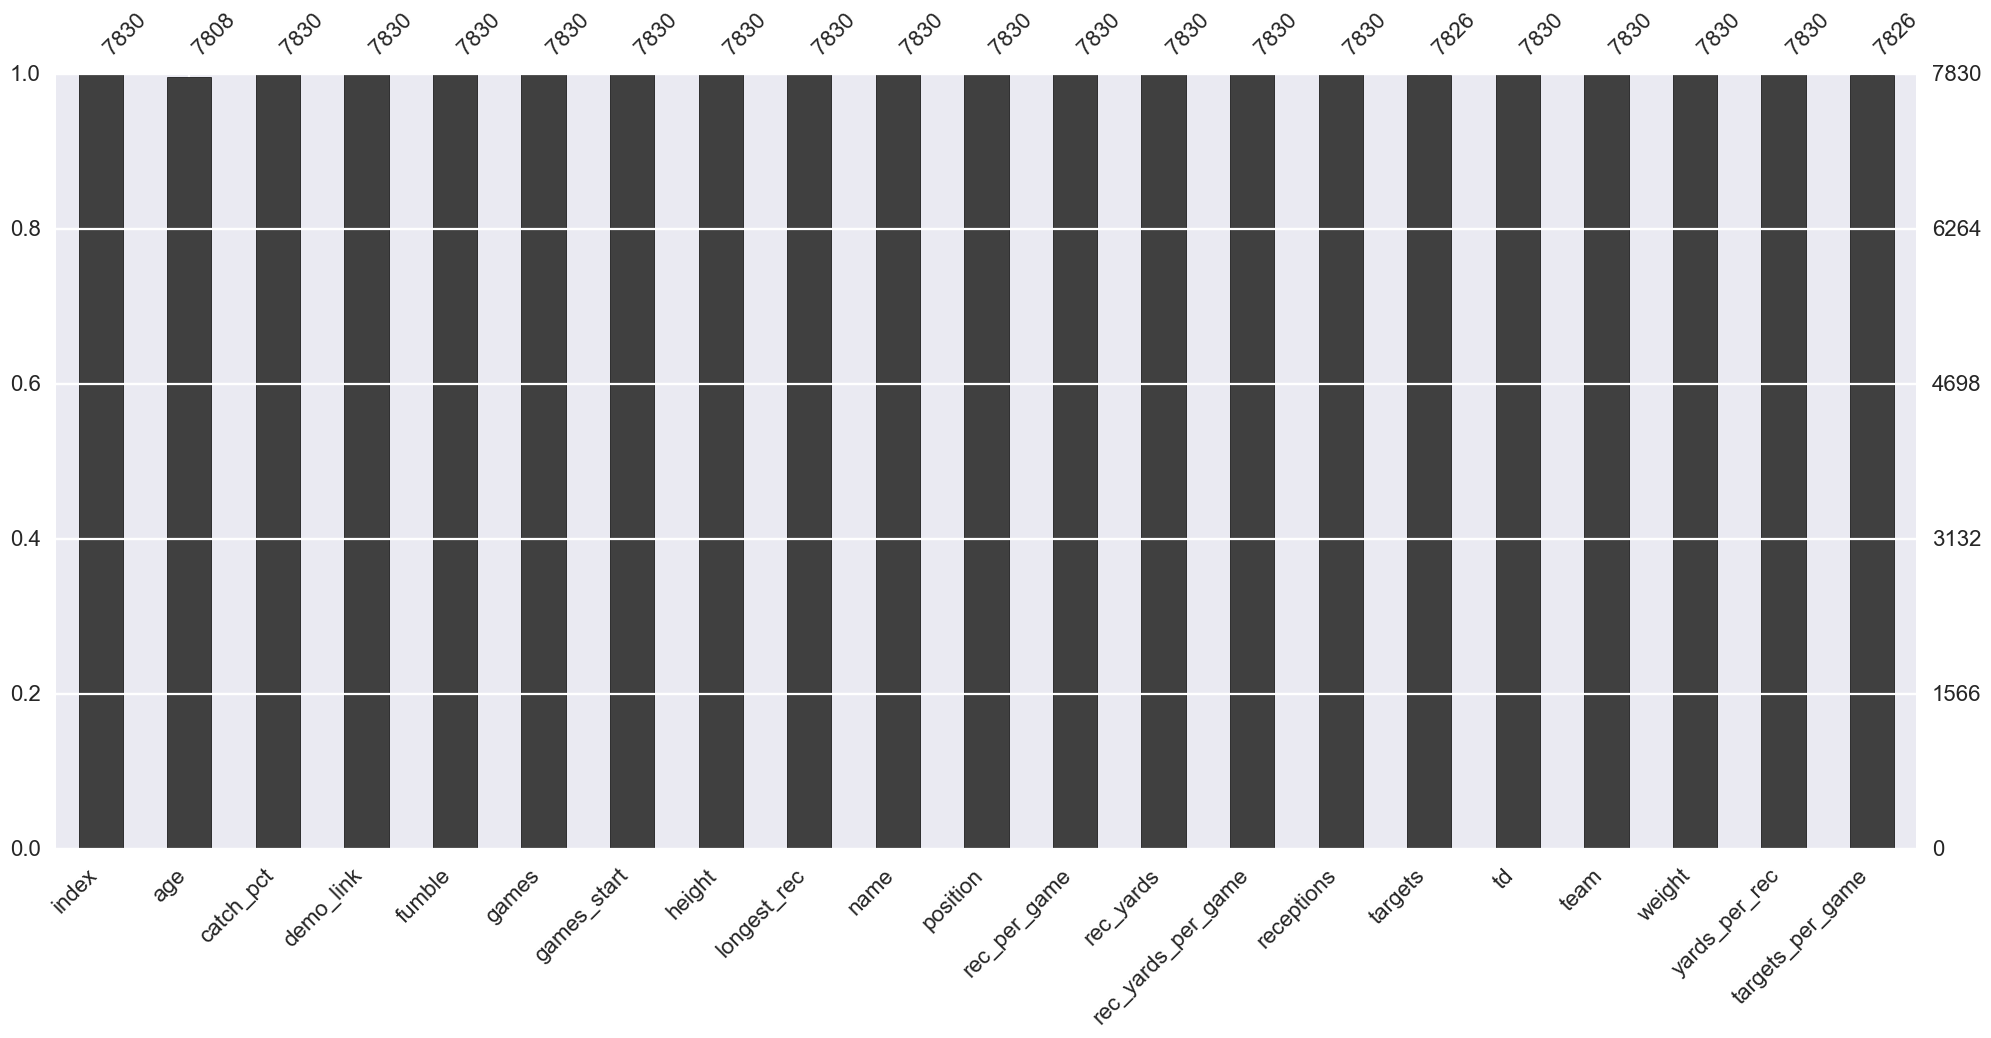

In [54]:
msno.bar(df, labels=True)

In [57]:
pivottablejs.pivot_ui(df)

In [58]:
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,7830
Total Missing (%),0.0%
Total size in memory,1.3 MiB
Average record size in memory,168.0 B
Numeric,13
Categorical,4
Date,0
Text (Unique),0
Rejected,4
Distinct count,23


I will have to decide on a certain set of filters for modeling, such as to only examine players who are true wide receiver position players vs. running backs or tight ends that get many targets or to only examine players with a minimum threshold of targets per game.

### Location and Spread

In [69]:
cols = {'weight': 'Weight', 'height': 'Height', 'rec_per_game': "Receptions per Game",
     'yards_per_rec': 'Yards per Reception', 'catch_pct': 'Catch %',
     'targets_per_game': 'Targets per Game', 'rec_yards_per_game': 'Receiving Yards per Game'}

col_list = list(cols.keys())

In [74]:
df[col_list].describe()

,rec_yards_per_game,rec_per_game,yards_per_rec,height,weight,targets_per_game,catch_pct
count,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7826.000000,7830.000000
mean,20.263768,1.785249,10.370179,73.124521,220.933589,2.879348,65.361520
std,21.204588,1.589293,5.211456,2.826430,27.457719,2.581166,17.763348
min,-5.000000,0.100000,-16.000000,65.000000,150.000000,0.000000,0.000000
25%,4.125000,0.500000,7.200000,71.000000,200.000000,0.800000,53.600000
50%,12.300000,1.300000,10.100000,73.000000,216.000000,2.000000,64.300000
75%,29.900000,2.700000,13.000000,75.000000,244.000000,4.375000,75.000000
max,122.800000,8.900000,81.000000,80.000000,336.000000,13.142857,100.000000


The interquartile range for most variables is quite small, compared to the overall range. It seems that there is s typical profile of wide recievers and then a few outliers thatare much better or much worse.

### Shape

In [75]:
df[col_list].apply(stats.skew)

rec_yards_per_game    1.419464
rec_per_game          1.110845
yards_per_rec         1.735189
height                0.043108
weight                0.448494
targets_per_game           NaN
catch_pct             0.183946
dtype: float64

In [76]:
df[col_list].apply(stats.kurtosis)

rec_yards_per_game     1.580229
rec_per_game           0.645756
yards_per_rec         14.531869
height                -0.737083
weight                -0.098816
targets_per_game            NaN
catch_pct              0.016496
dtype: float64

In [97]:
def make_histogram(col, title, bins=50):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.hist(df[col].dropna().values, bins=bins);
    ax.set_xlabel(title);
    ax.set_ylabel('Number of Players');
    ax.set_title(title + ' Distribution of Wide Receivers from 2000-2017');

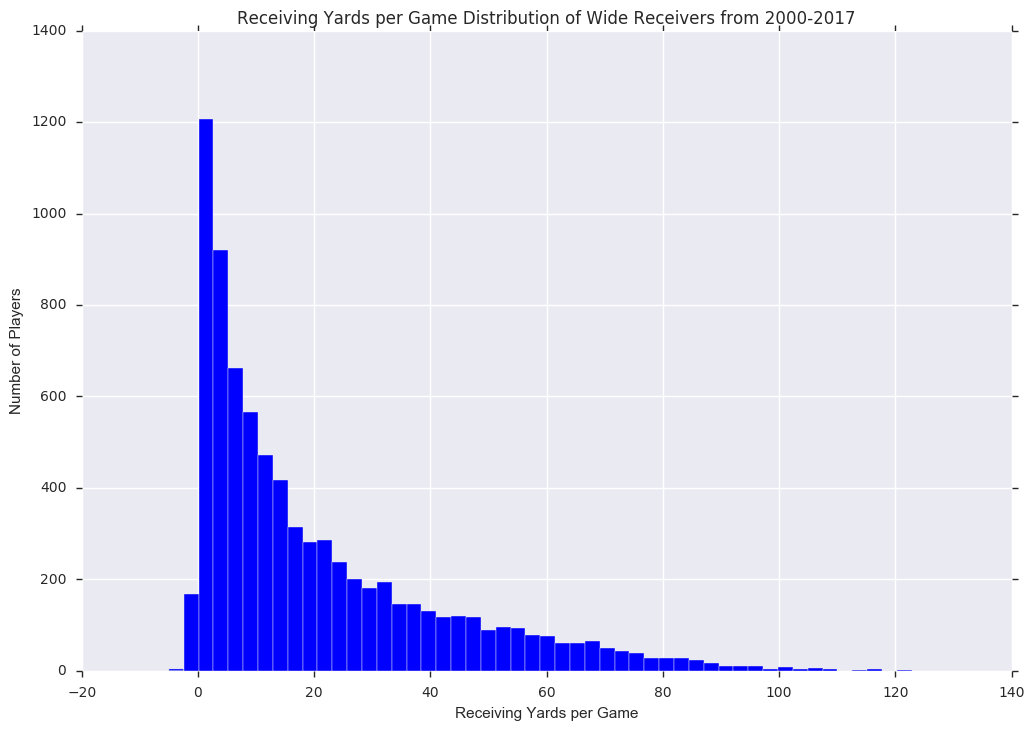

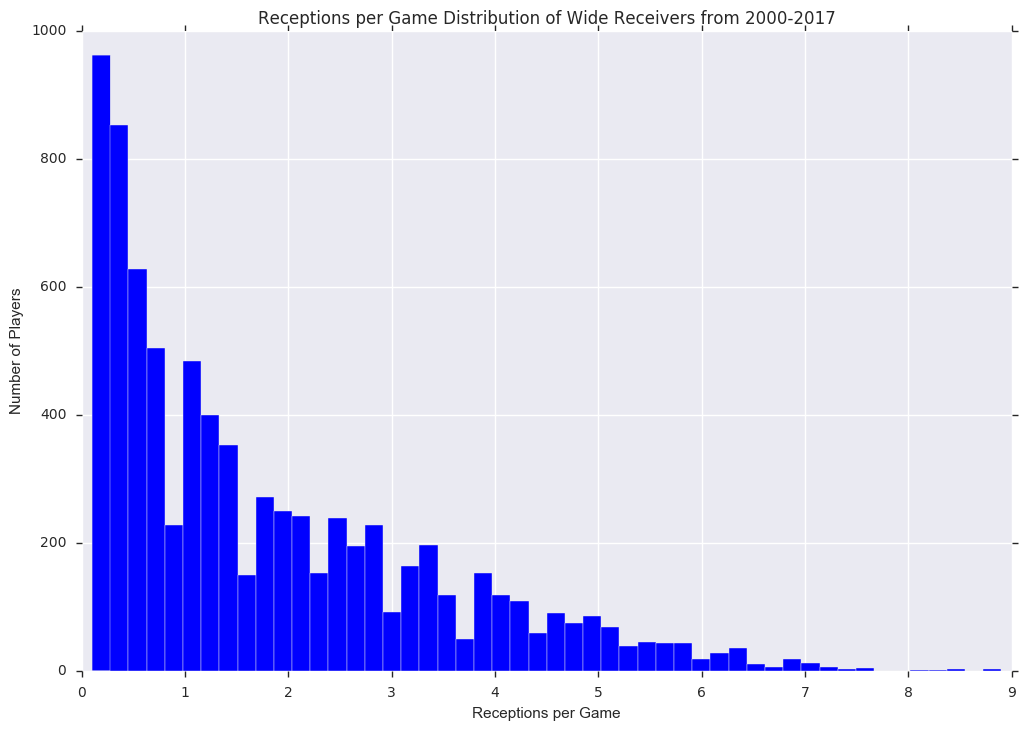

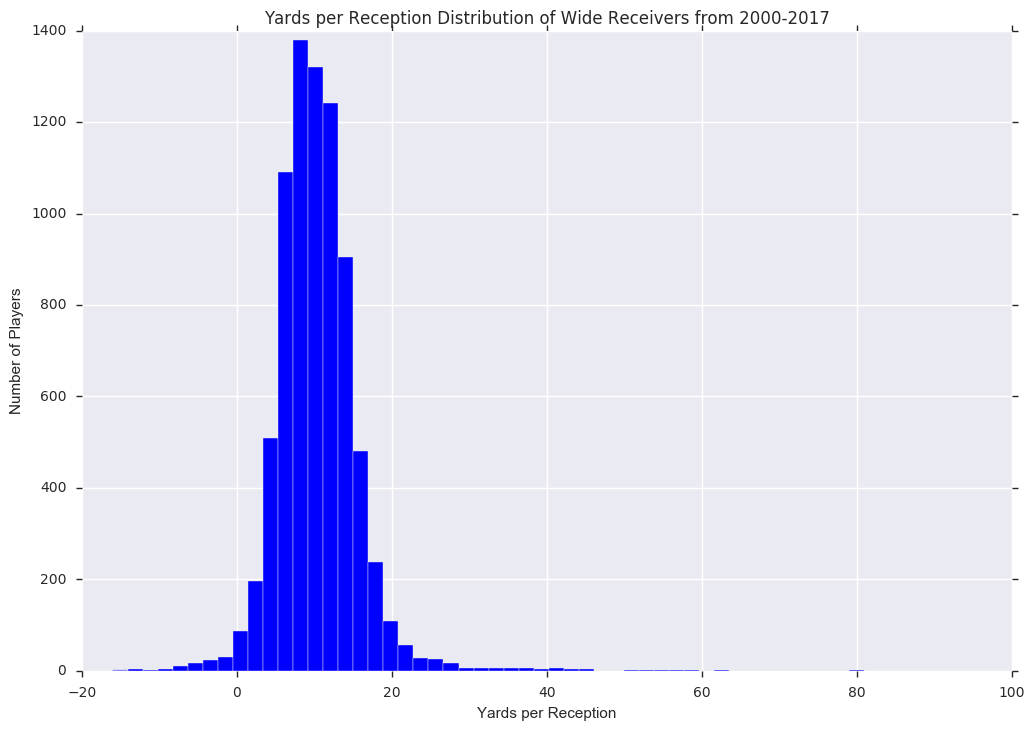

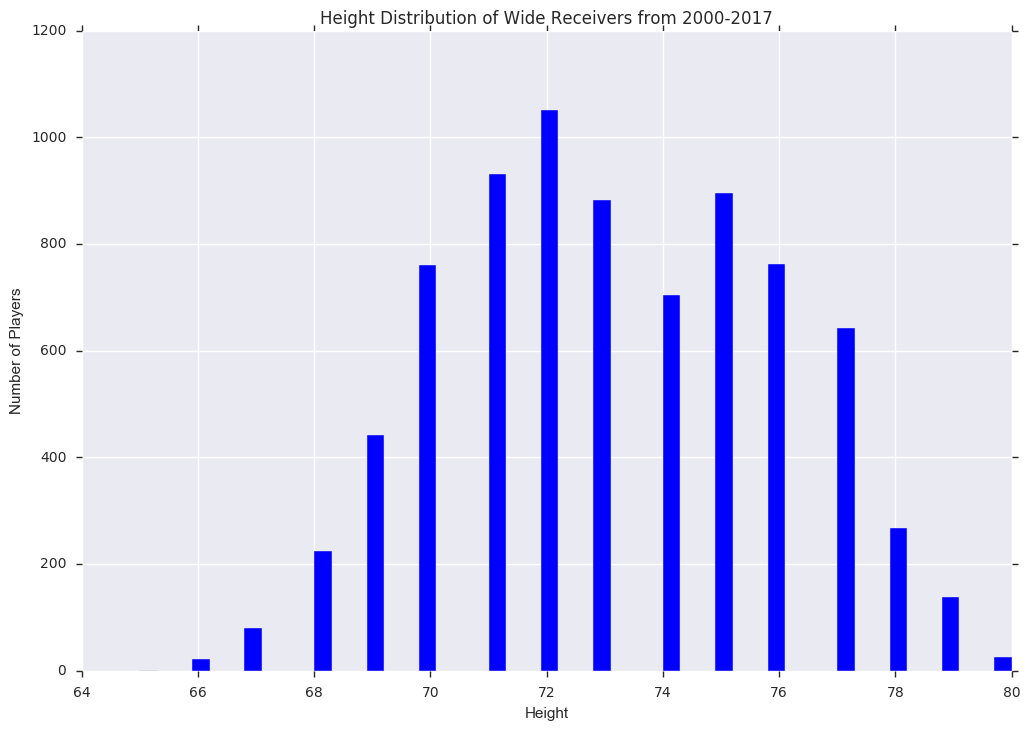

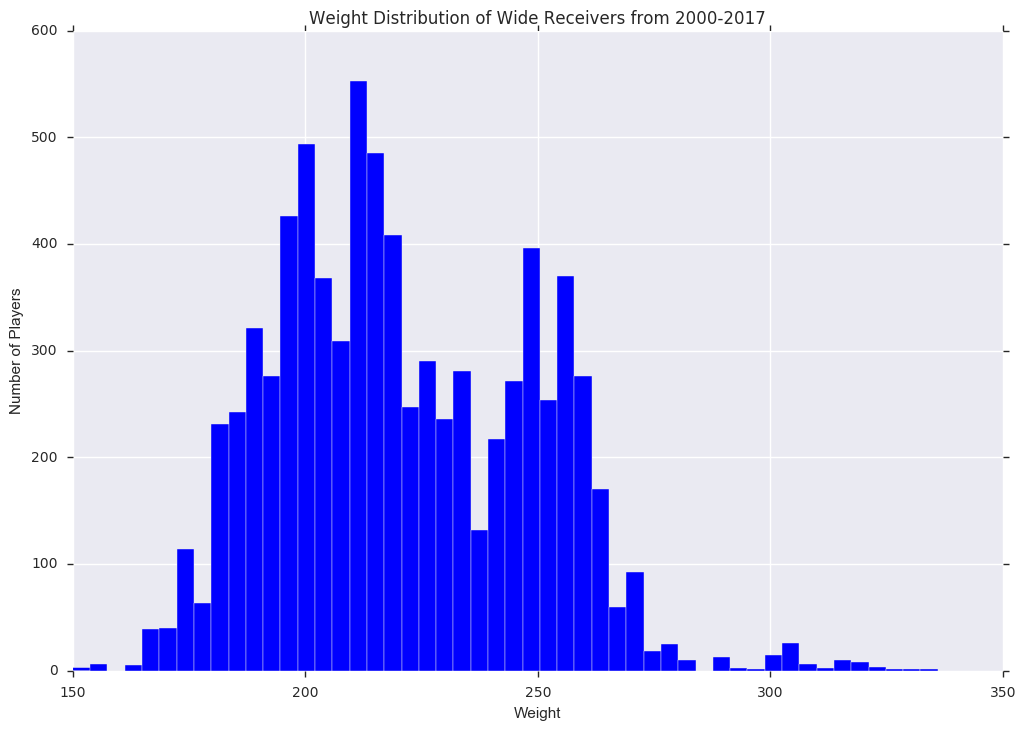

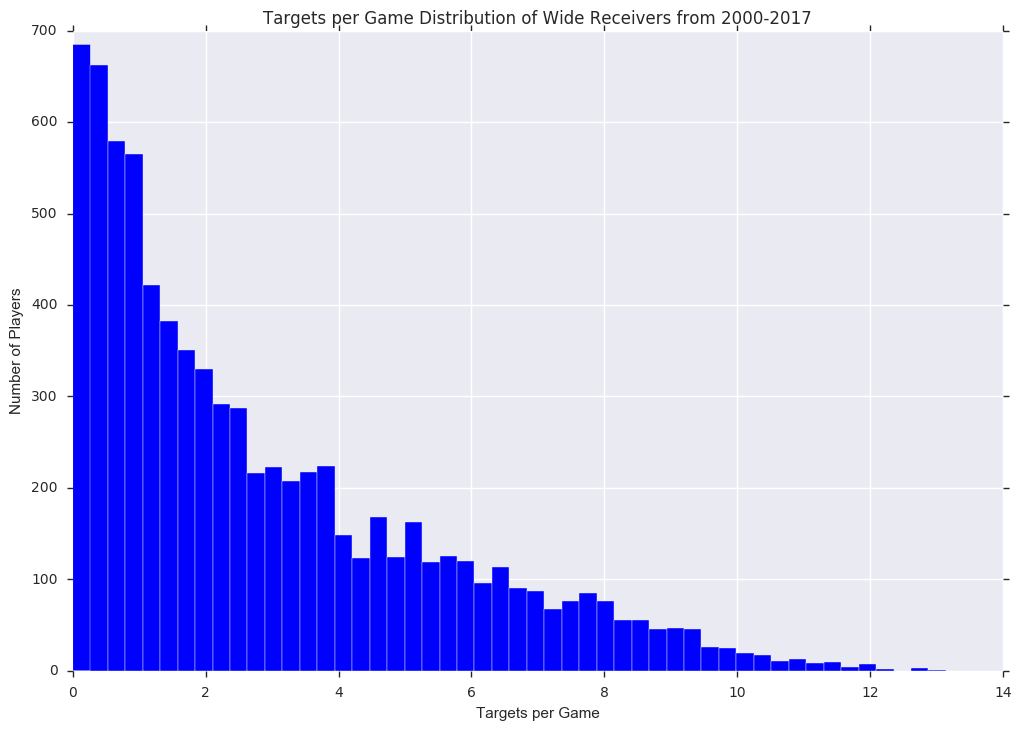

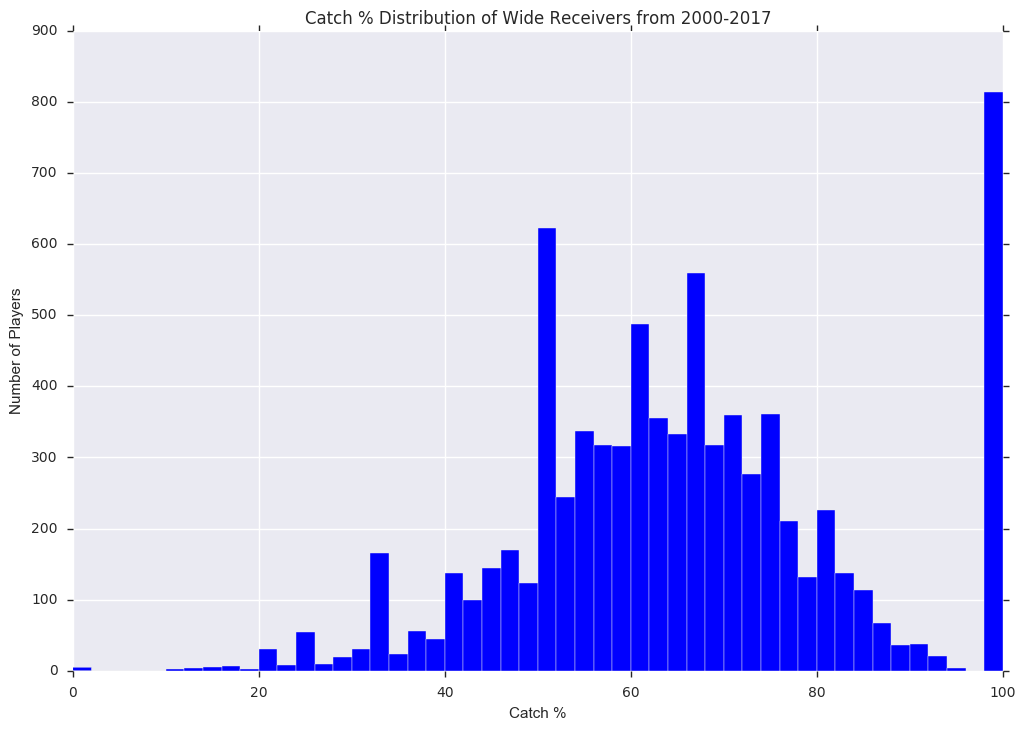

In [99]:
for k, v in cols.items():
    make_histogram(k, v)

### Bivariate

Target variable is *rec_per_yards*

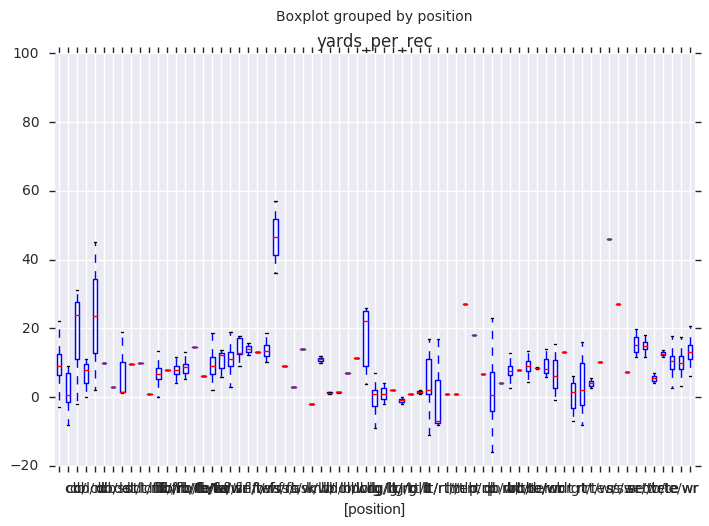

In [112]:
df[['yards_per_rec', 'position']].boxplot(by='position');

In [105]:
df['position'].value_counts()

wr             2258
               1972
te             1273
rb             1152
fb              520
fb/te           115
te/wr           106
qb               88
fb/rb            85
fb/wr            38
rb/wr            30
rb/te            24
lg               13
c                12
lt               12
fl/wr            10
fb/te/wr          9
se/wr             9
rg                6
fb/rb/te          6
rt                6
fl                5
lcb               5
se                4
rcb               3
lt/rt             3
cb                3
cb/lcb            3
tb/te             3
de                3
               ... 
fs                2
lolb              2
lt/rt/te          1
fb/rb/te/wr       1
rb/tb             1
lg/lt/rt          1
rdt               1
fb/rb/wr          1
fs/ss             1
lg/rt/t           1
s/wr              1
s/ss              1
fs/rb             1
dt/ldt            1
fs/wr             1
qb/wr             1
db                1
fl/te             1
lb/mlb            1


In [106]:
positions = ['wr', 'te', 'rb', 'fb']
filtered_positions = df.loc[df['position'].isin(positions)]

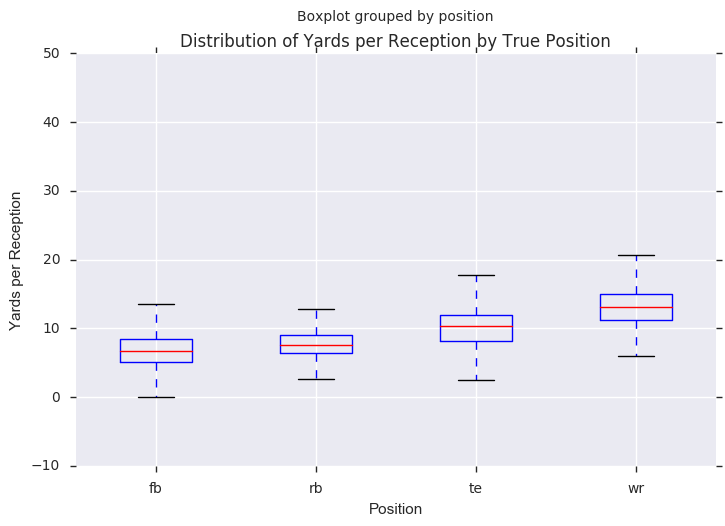

In [111]:
filtered_positions[['yards_per_rec', 'position']].boxplot(by='position')
plt.xlabel('Position')
plt.ylabel('Yards per Reception')
plt.title('Distribution of Yards per Reception by True Position');

In [114]:
df.columns

Index(['index', 'age', 'catch_pct', 'demo_link', 'fumble', 'games',
       'games_start', 'height', 'longest_rec', 'name', 'position',
       'rec_per_game', 'rec_yards', 'rec_yards_per_game', 'receptions',
       'targets', 'td', 'team', 'weight', 'yards_per_rec', 'targets_per_game'],
      dtype='object')

In [138]:
def make_scatter(x, y):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.scatter(df[x], df[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(x + y);

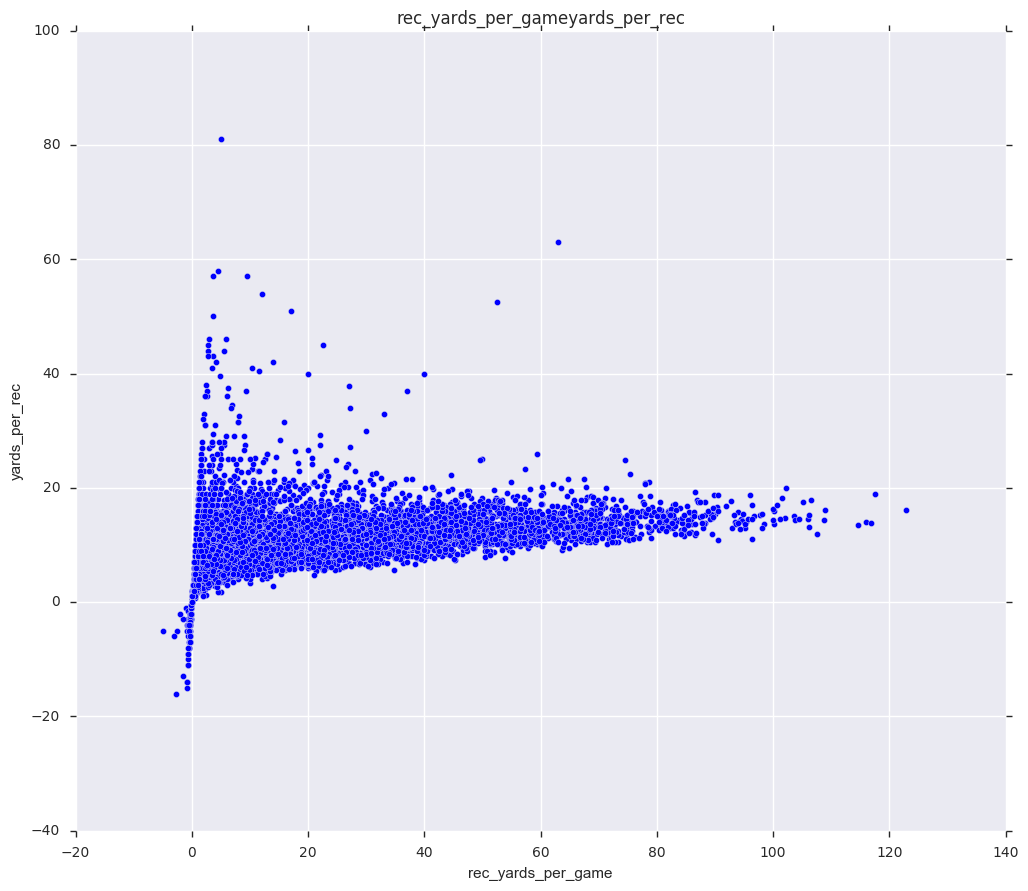

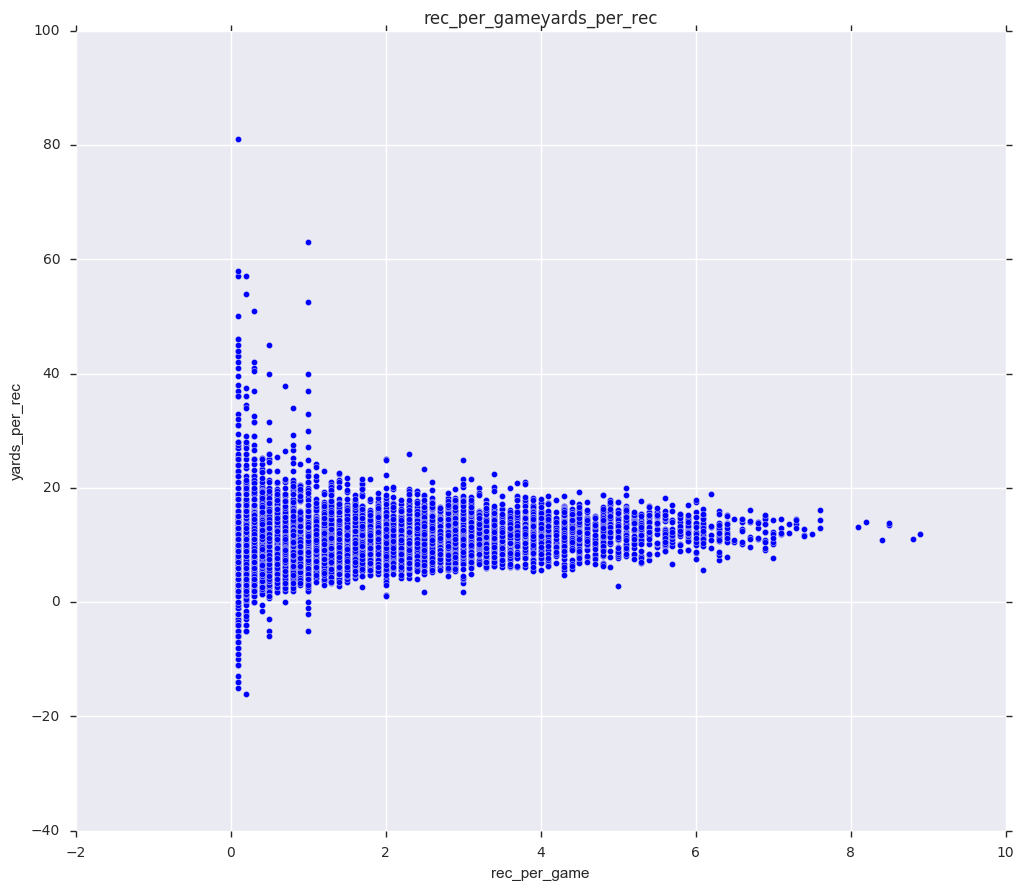

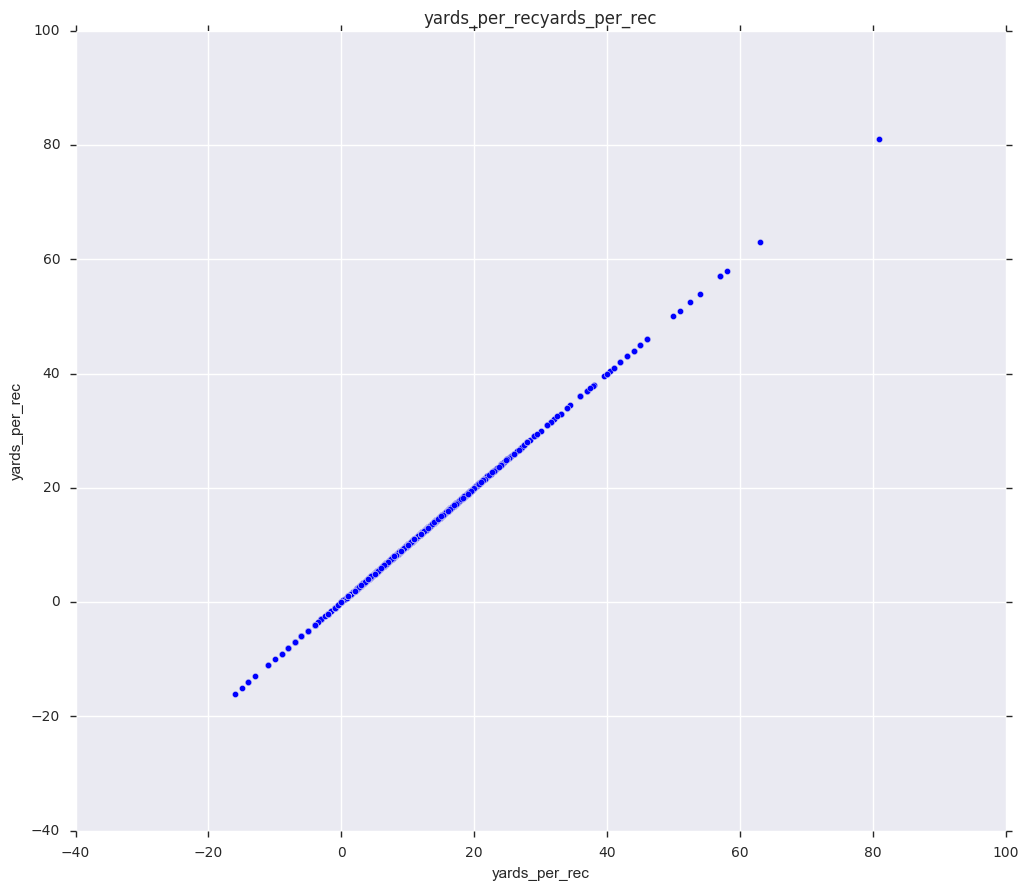

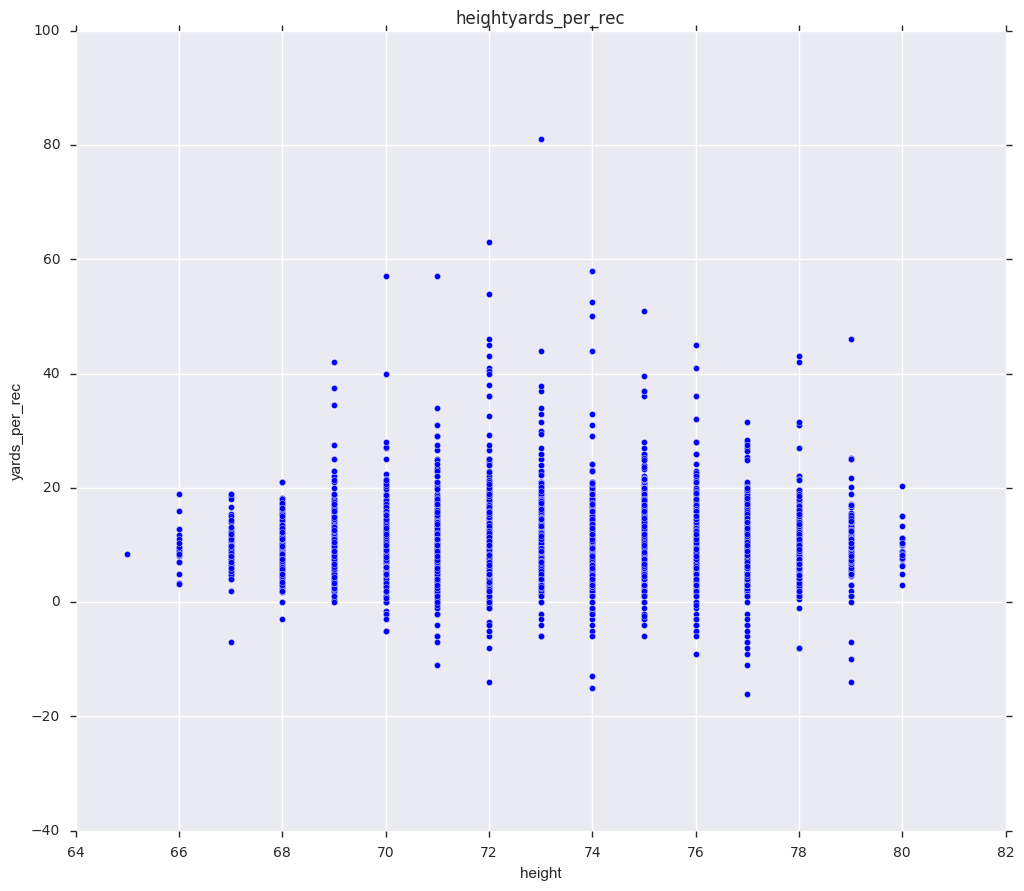

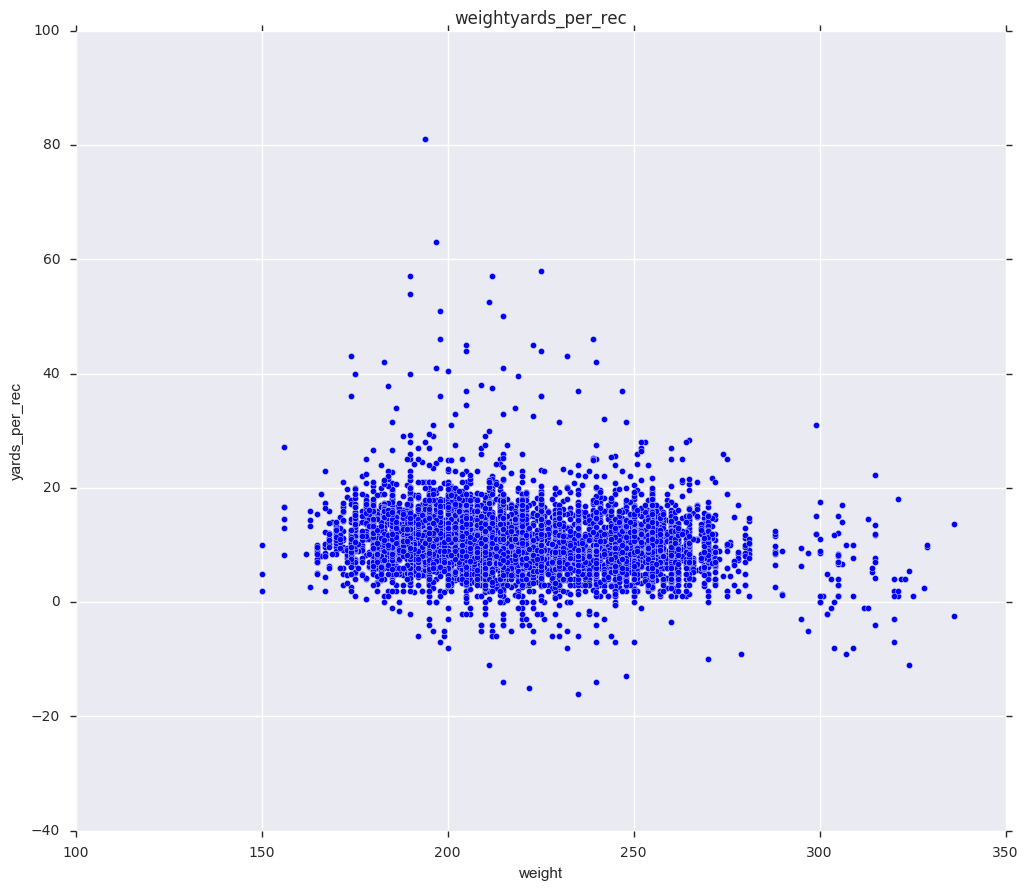

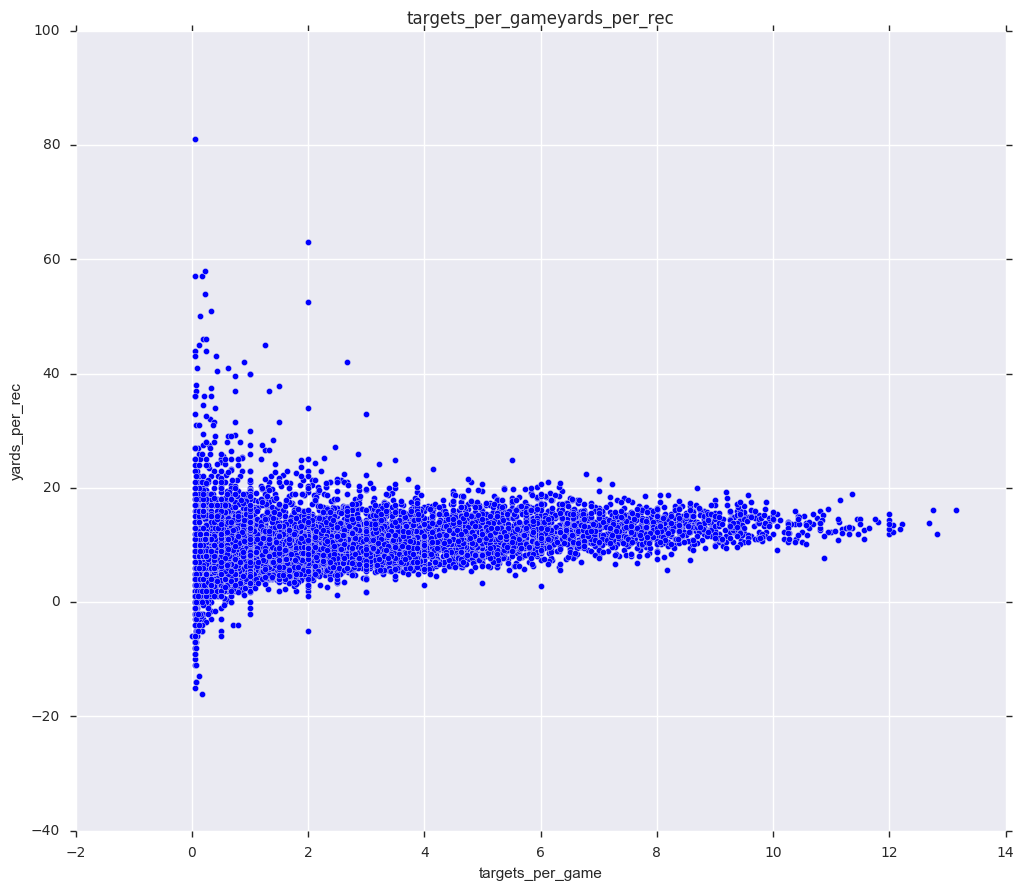

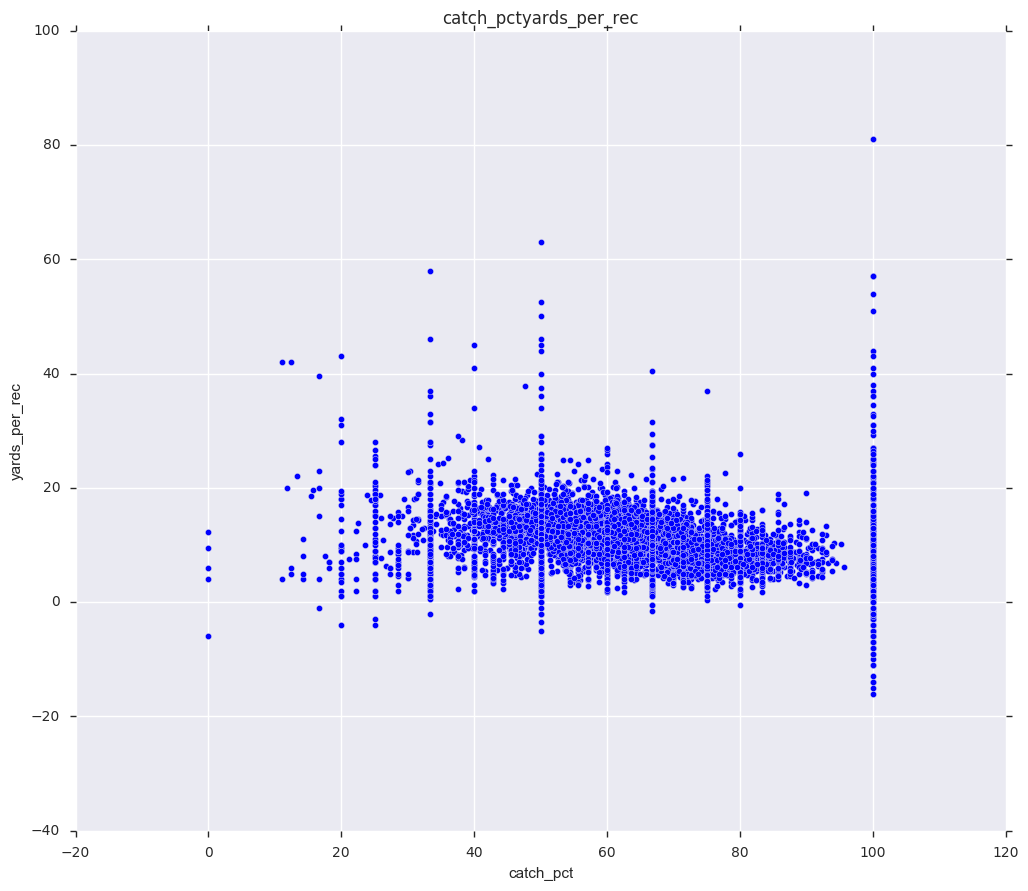

In [139]:
for feature in col_list:
    make_scatter(feature, 'yards_per_rec')

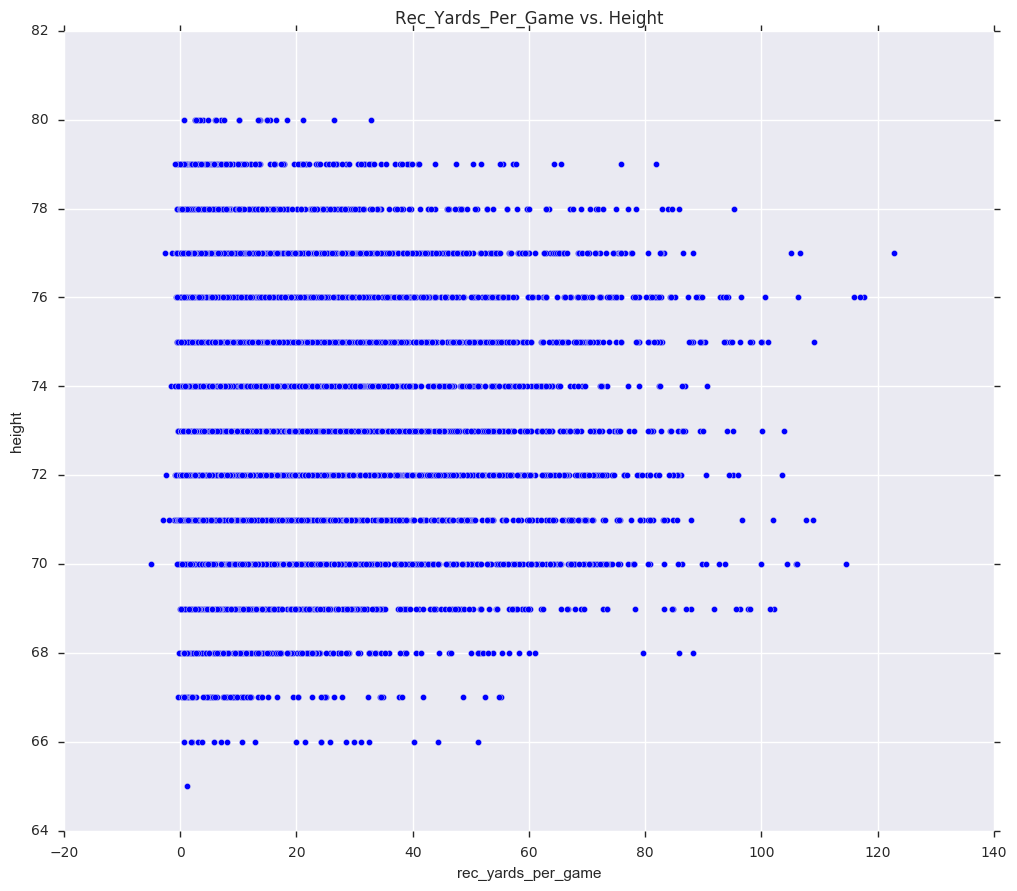

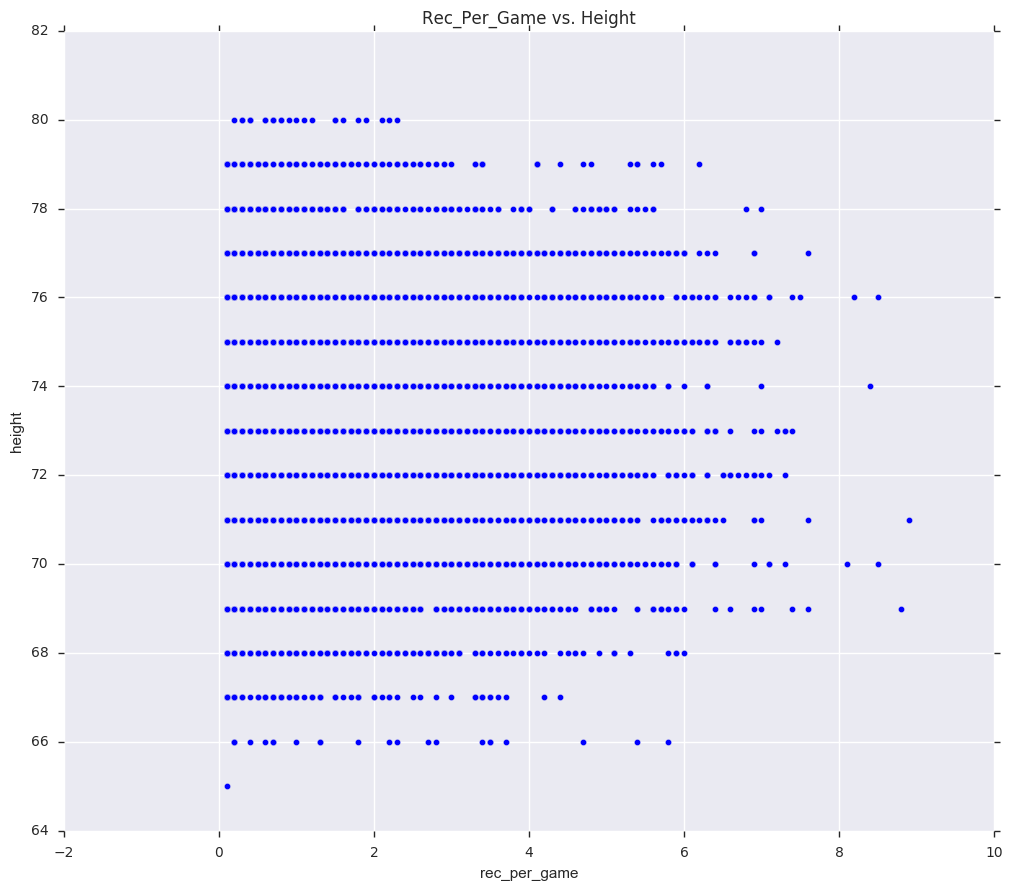

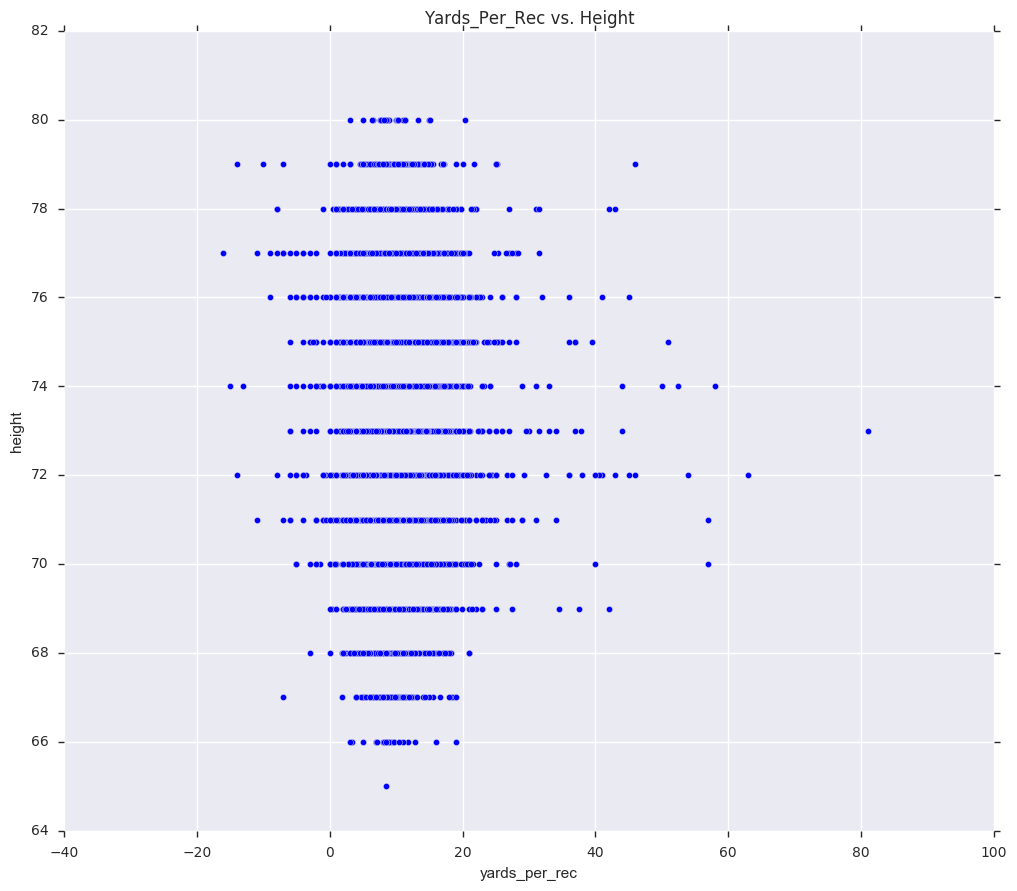

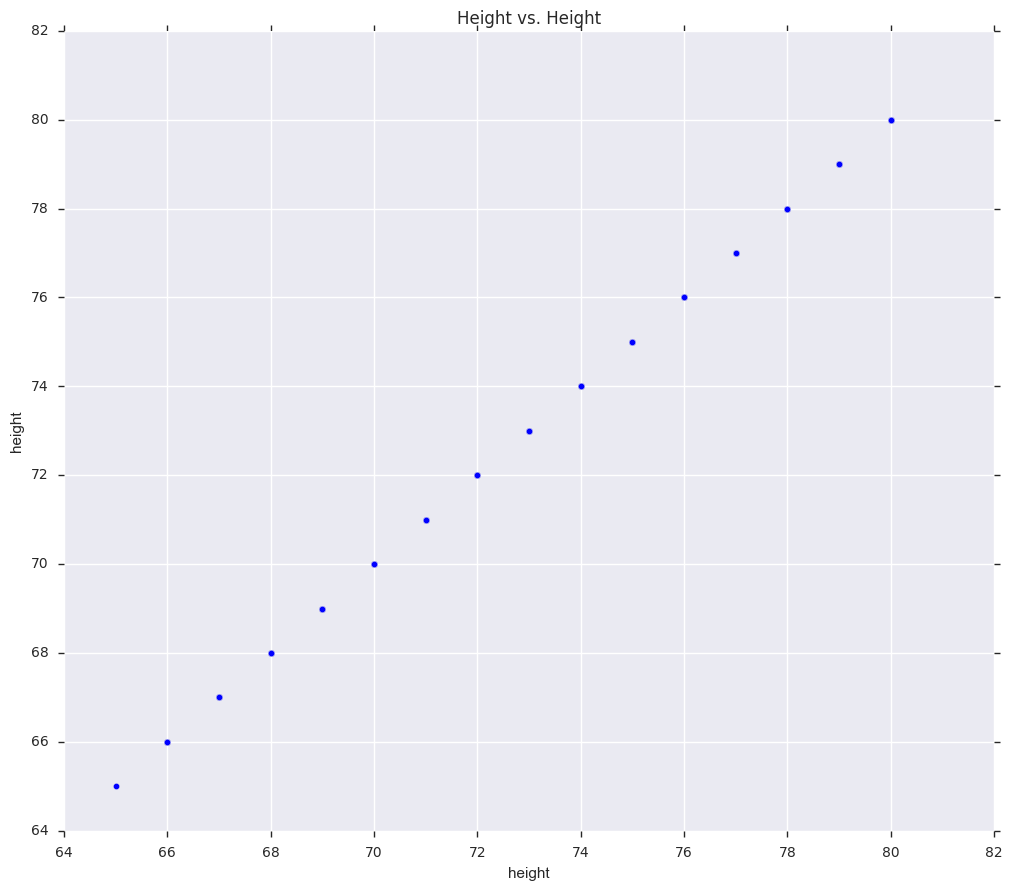

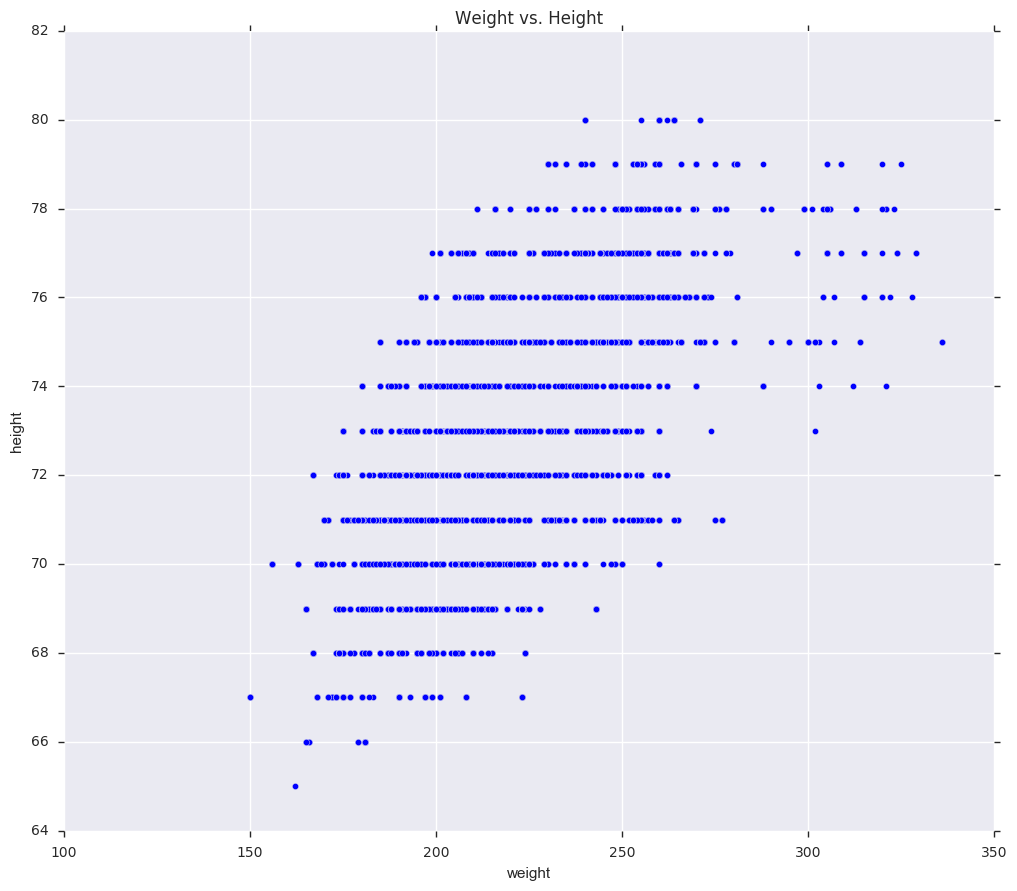

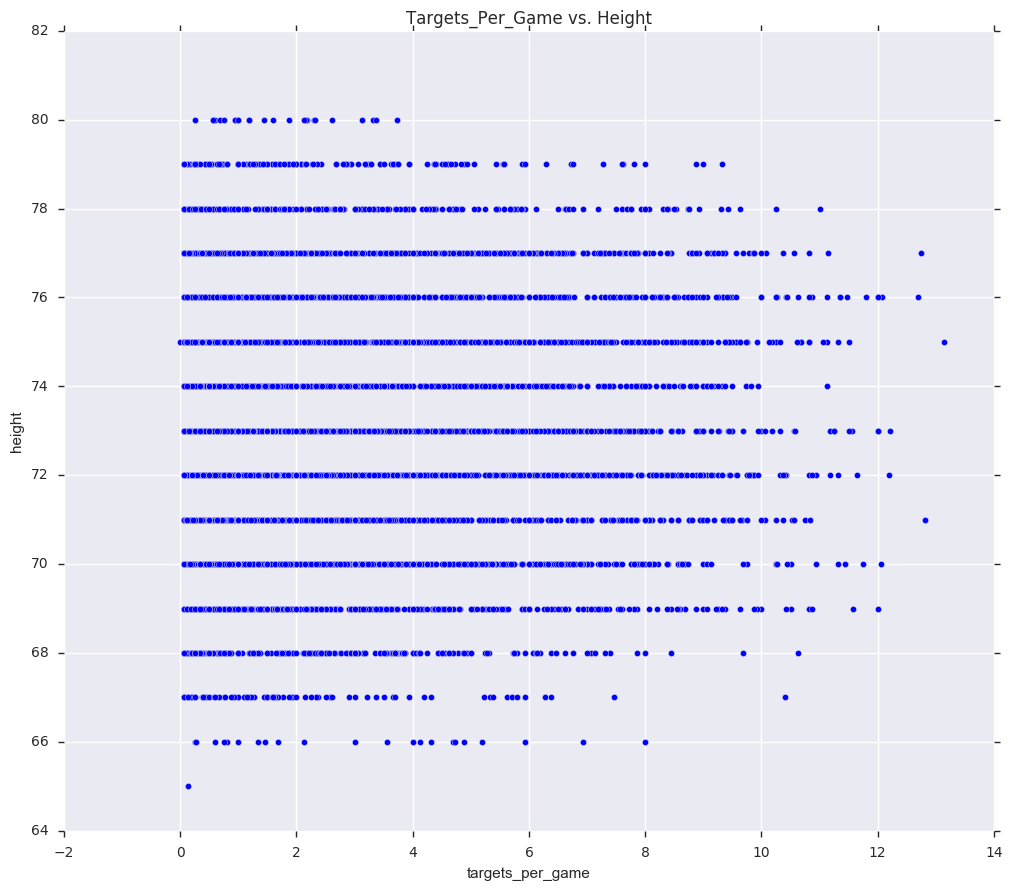

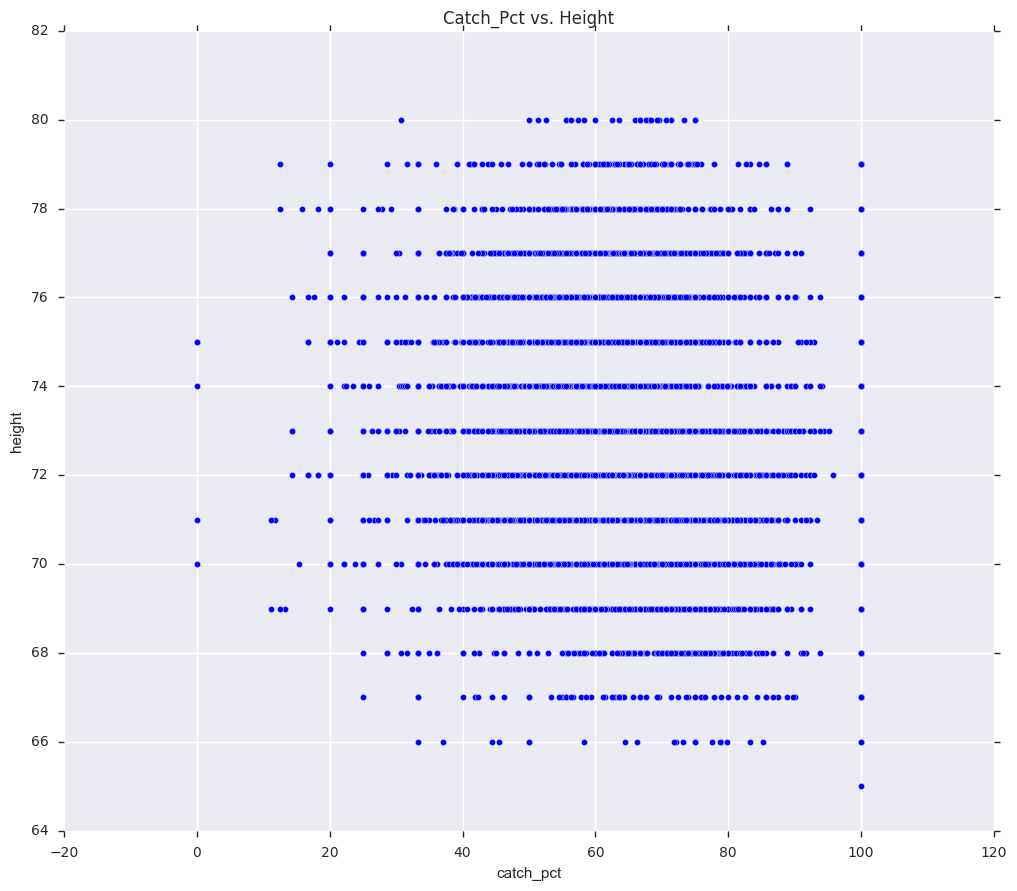

In [137]:
for feature in col_list:
    make_scatter(feature, 'height')

### Multivariate

In [129]:
corr = df.corr()
print(corr)

                       index       age  catch_pct    fumble     games  \
index               1.000000 -0.088917   0.062730 -0.081307 -0.196099   
age                -0.088917  1.000000   0.009051 -0.019754  0.106893   
catch_pct           0.062730  0.009051   1.000000  0.157588 -0.057361   
fumble             -0.081307 -0.019754   0.157588  1.000000  0.215452   
games              -0.196099  0.106893  -0.057361  0.215452  1.000000   
games_start        -0.119857  0.210397  -0.026707  0.272474  0.491553   
height             -0.002089  0.013543  -0.068846 -0.128248  0.038119   
longest_rec        -0.015380  0.025664  -0.220727  0.076620  0.304634   
rec_per_game       -0.007113  0.121664  -0.064004  0.145653  0.178351   
rec_yards          -0.064358  0.113838  -0.148047  0.122557  0.388270   
rec_yards_per_game -0.008186  0.105116  -0.148511  0.081709  0.182211   
receptions         -0.072554  0.132304  -0.080765  0.189832  0.430493   
targets            -0.088354  0.129072  -0.194825  

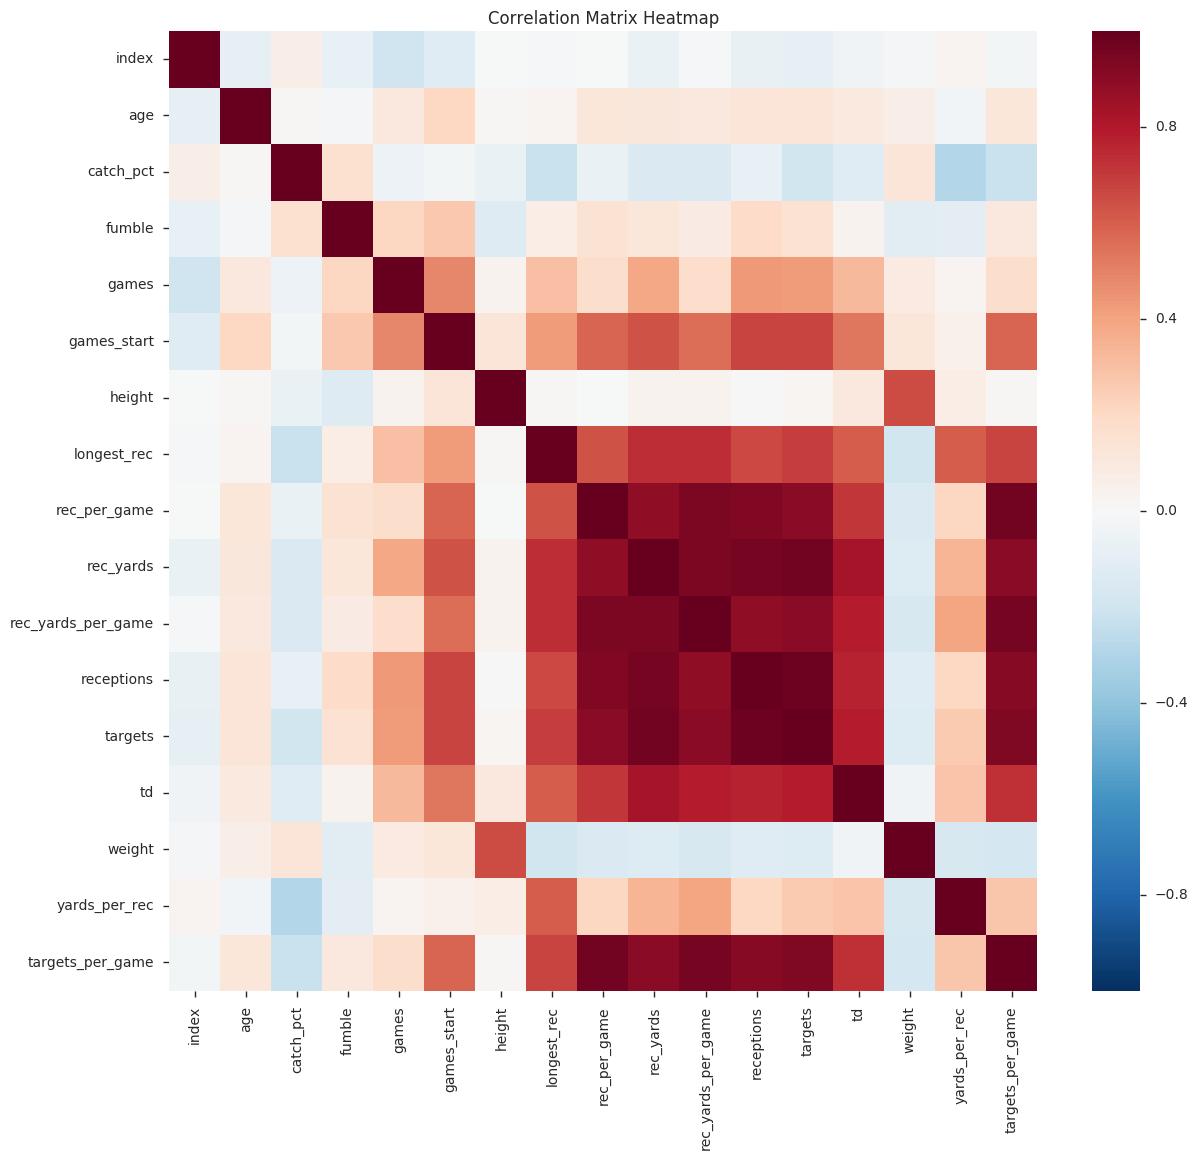

In [130]:
fig, ax = plt.subplots(figsize=(14,12));
sns.heatmap(corr, ax=ax);
plt.xlabel('');
plt.ylabel('');
plt.title('Correlation Matrix Heatmap');